<a href="https://colab.research.google.com/github/FarrellMinette/QuantumComputing/blob/main/Qiskit_Intruduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
# !pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2dacb2a59e7f59bbbdd9f228b8fd1236162876378e9b5fb8812b28c28afc243f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c0040

In [ ]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit.circuit.library import *

from qiskit_aer import *
from qiskit_ibm_runtime import *

import numpy as np
from math import pi

In [ ]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.25.0', 'qiskit': '0.44.0', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table

In [ ]:
# !pip install qiskit-nature   :   https://qiskit.org/ecosystem/nature/
# !pip install pyscf

# !pip install qiskit[machine-learning] :    https://qiskit.org/ecosystem/machine-learning/
# !pip install 'qiskit-machine-learning[torch]'

# !pip install qiskit[optimization]  :  https://qiskit.org/ecosystem/optimization/

# !pip install qiskit[finance]  :  https://qiskit.org/ecosystem/finance/

# !pip install qiskit[all]

In [3]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit.circuit.library import *

from qiskit_aer import *
from qiskit_ibm_runtime import *

import numpy as np
from math import pi

q = QuantumRegister(2)
circuit = QuantumCircuit(q)

# Pauli X-gate
circuit.x(q)
circuit.draw()

# Pauli Y-gate
circuit.y(q)
circuit.draw()

# Pauli Z-gate
circuit.x(q)
circuit.draw()

┌───┐┌───┐┌───┐
q2_0: ┤ X ├┤ Y ├┤ X ├
      ├───┤├───┤├───┤
q2_1: ┤ X ├┤ Y ├┤ X ├
      └───┘└───┘└───┘

In [ ]:
# from qiskit import QuantumCircuit, transpile
# from qiskit.visualization import plot_histogram
# from qiskit_aer import AerSimulator

#Qasm Simulator

In [ ]:
# Create a Quantum Circuit acting on the q register Here, you are initializing with 2 qubits in the zero state;
# with 2 classical bits set to zero; and circuit is the quantum circuit.
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0, 1], [0, 1])

# Draw the circuit
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In this circuit, the qubits are ordered with qubit zero at the top and qubit one at the bottom. The circuit is read left-to-right, meaning that gates which are applied earlier in the circuit show up farther to the left.

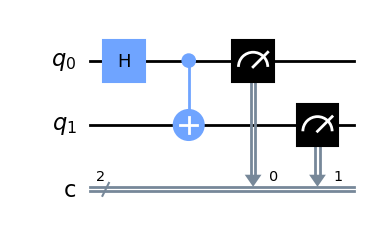

In [ ]:
# Matplotlib
circuit.draw("mpl")

Simulate the Experiment

Qiskit Aer is a high performance simulator framework for quantum circuits. It provides several backends to achieve different simulation goals.


In [ ]:
# Use Aer's AerSimulator
# simulator = AerSimulator()

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Compile the circuit for the support instruction set (basis_gates) and topology (coupling_map) of the backend
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
job = simulator.run(compiled_circuit, shots=10000)
#The number of shots of the simulation was set to be 1000 (the default is 1024).

# Grab results from the job
result = job.result()

counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

In [ ]:
# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)


Total count for 00 and 11 are: {'00': 4963, '11': 5037}


As expected, the output bit string is 00 approximately 50 percent of the time.

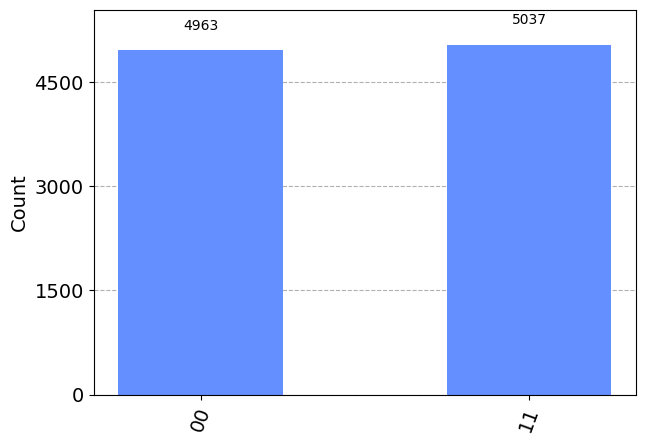

In [ ]:
#Visualize the Results
plot_histogram(counts)

The observed probabilities Pr(00) and Pr(11) are computed by taking the respective counts and dividing by the total number of shots.


In [ ]:
# The visualization module contain functions that visualizes measurement outcome counts,
# quantum states, circuits, pulses, devices and more.

# plot_bloch_vector
# plot_bloch_multivector
# plot_state_qsphere

# plot_state_city
# plot_state_hinton

---
---

#Statevector backend

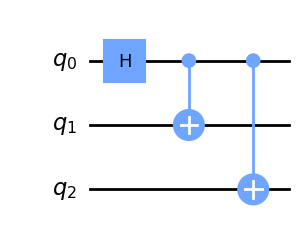

In [ ]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

circ.draw('mpl')

In [ ]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution
job = backend.run(circ)
result = job.result()

outputstate = result.get_statevector(circ, decimals=3)

In [ ]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [ ]:
print(outputstate)

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


In [ ]:
outputstate.is_valid()

False

In [ ]:
np.linalg.norm(outputstate)

0.9998489885977782

In [ ]:
np.around(outputstate, 4)

array([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
       0.   +0.j, 0.707+0.j])

In [ ]:
#draw using latex
outputstate.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
#Alternative way of representing in latex
array_to_latex(outputstate)

<IPython.core.display.Latex object>

In [ ]:
outputstate.probabilities()

array([0.499849, 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.499849])

In [ ]:
np.around(outputstate.probabilities(),3)

array([0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0.5])

We can clearly see that these probabilities sum to 1, so our given state is normalized

In [ ]:
(np.around(outputstate.probabilities(),3)).sum()

1.0

We can create statevectors with multiple qubits like this

In [ ]:
sv_eq = Statevector([1/2, 3/4, 4/5, 6/8])

sv_eq.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
sv_eq.probabilities()

array([0.25  , 0.5625, 0.64  , 0.5625])

In [ ]:
(np.around(sv_eq.probabilities(),3)).sum()

2.0140000000000002

Note that the vector above is not a valid state vector as it is not normalised. We can check this with the is_valid() method:

In [ ]:
sv_eq.is_valid()

False

In [ ]:
np.linalg.norm(sv_eq)

1.419506956657839

In [ ]:
np.sv_nr = sv_eq/np.linalg.norm(sv_eq)
np.sv_nr

Statevector([0.35223498+0.j, 0.52835247+0.j, 0.56357596+0.j,
             0.52835247+0.j],
            dims=(2, 2))


In [ ]:
sv_eq_nr = Statevector(np.sv_nr)

sv_eq_nr.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
sv_eq_nr.is_valid()

True

In [ ]:
np.linalg.norm(sv_eq_nr)

0.9999999999999999

We can create statevector such as $|+\rangle$ using the `Statevector` class:

In [ ]:
plus_state = Statevector.from_label("+")
plus_state

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [ ]:
plus_state.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
plus_state.probabilities_dict()

{'0': 0.4999999999999999, '1': 0.4999999999999999}

In [ ]:
# run this cell multiple times to show collapsing into one state or the other
res = plus_state.measure()

res

('1',
 Statevector([0.+0.j, 1.+0.j],
             dims=(2,)))

In [ ]:
sv_bell = Statevector([np.sqrt(1/2), 0, 0, np.sqrt(1/2)])

sv_bell.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
sv_bell.probabilities_dict()

{'00': 0.5000000000000001, '11': 0.5000000000000001}

All 4 Bell states

In [ ]:
sv_psi_plus =  Statevector([0, np.sqrt(1/2), np.sqrt(1/2), 0]) # create a statevector for |𝜓+⟩ here
sv_psi_minus = Statevector([0, np.sqrt(1/2), - np.sqrt(1/2), 0])# create a statevector for |𝜓−⟩ here

sv_phi_minus = Statevector([np.sqrt(1/2), 0, 0, - np.sqrt(1/2)])# create a statevector for |𝜙−⟩ here
sv_phi_plus = Statevector([np.sqrt(1/2), 0, 0,  np.sqrt(1/2)])# create a statevector for |𝜙+⟩ here

#Unitary backend

This backend calculates the $2^{n}*2^{n}$
 matrix representing the gates in the quantum circuit.

In [ ]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = backend.run(circ)
result = job.result()

# Show the results
output_unitary = result.get_unitary(circ, decimals=3)
print(output_unitary)

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
           -0.707+0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
            0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 

In [ ]:
output_unitary.data

array([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

In [ ]:
array_to_latex(output_unitary, prefix="\\text{GHZunitary} = ", max_size=10)

<IPython.core.display.Latex object>

##Unitary representation of a circuit (another method using qiskit.quantum_info)

In [ ]:
# from qiskit.quantum_info import Operator, Statevector
# from qiskit.quantum_info import *

circ4 = QuantumCircuit(2)
circ4.x(0)
circ4.h(1)

U = Operator(circ4)

# Show the results
U.data

array([[ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
         0.70710678+0.j],
       [ 0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
        -0.70710678+0.j],
       [ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
         0.        +0.j]])

In [ ]:
array_to_latex(U.data)

<IPython.core.display.Latex object>

In [ ]:
U.is_unitary()

True

# Visualization tools, Bloch Sphere & qSphere & State city

## Plot Histogram

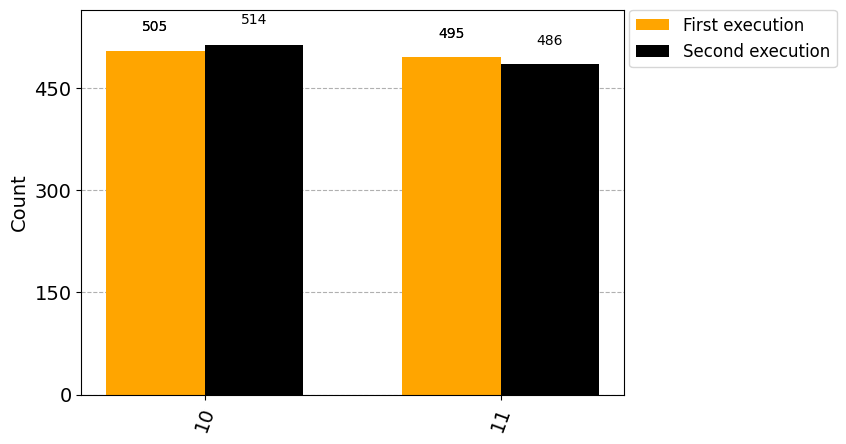

In [ ]:
# quantum circuit to make a Bell state
qc2 = QuantumCircuit(2, 2)
qc2.h(0)
qc2.x(1)

qc2.measure([0,1], [0,1])

# execute the quantum circuit

backend = AerSimulator()
result = backend.run(transpile(qc2, backend), shots=1000).result()
counts  = result.get_counts(qc2)

# Execute 2-qubit Bell state again
second_result = backend.run(transpile(qc2, backend), shots=1000).result()
second_counts  = second_result.get_counts(qc2)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend , color=['orange', 'black'])

## plot_state_city:
The standard view for quantum states where the real and imaginary (imag) parts of the state matrix are plotted like a city

In [ ]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.s(0)
bell.cx(0, 1)

# execute the quantum circuit
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(bell, backend)).result()
psi  = result.get_statevector(bell)
array_to_latex(psi)

<IPython.core.display.Latex object>

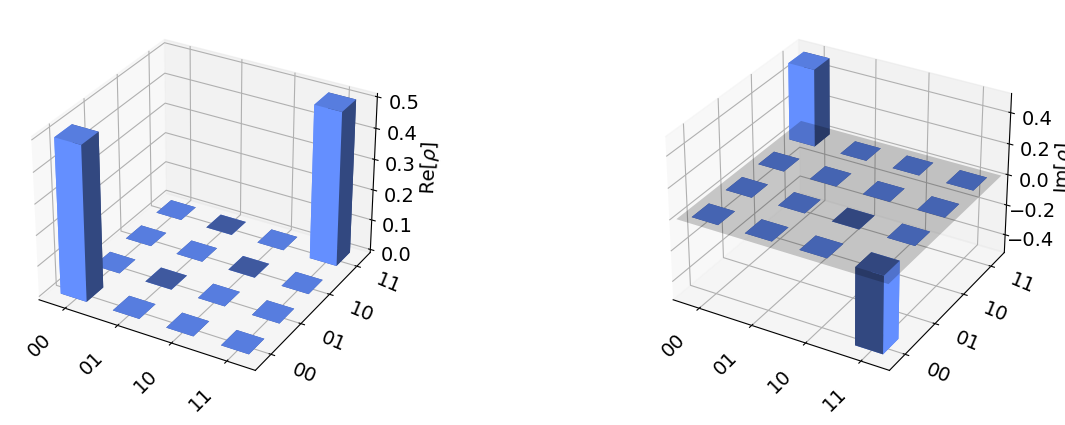

In [ ]:
plot_state_city(psi)

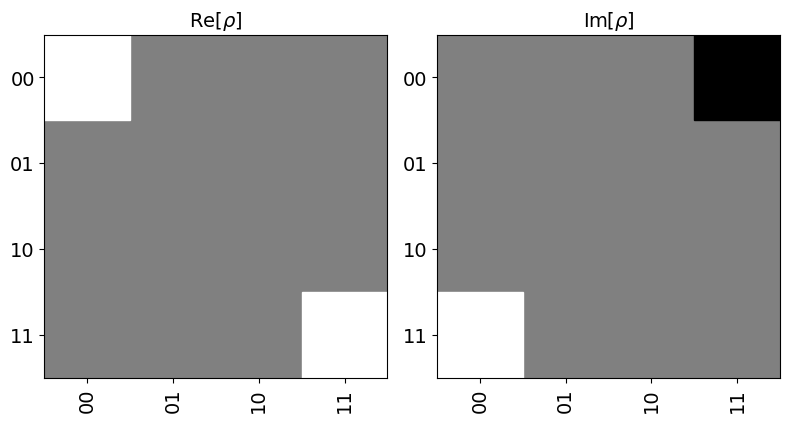

In [ ]:
plot_state_hinton(psi)

## qSphere
The Qiskit unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different 'qsphere' for each component.

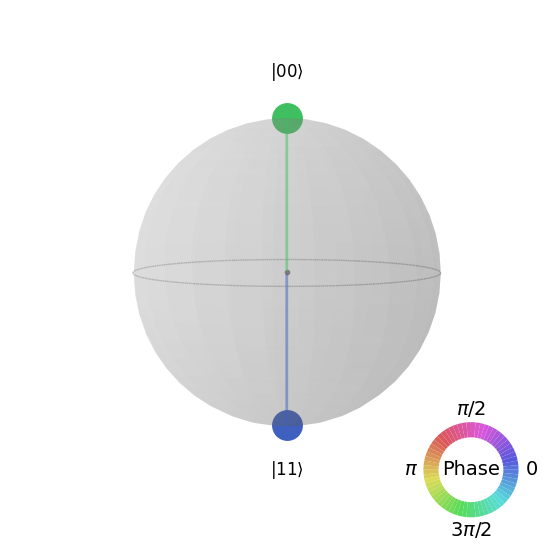

In [ ]:
plot_state_qsphere(psi)

##plot_bloch_multivector
The projection of the quantum state onto the single qubit space and plotting on a bloch sphere.

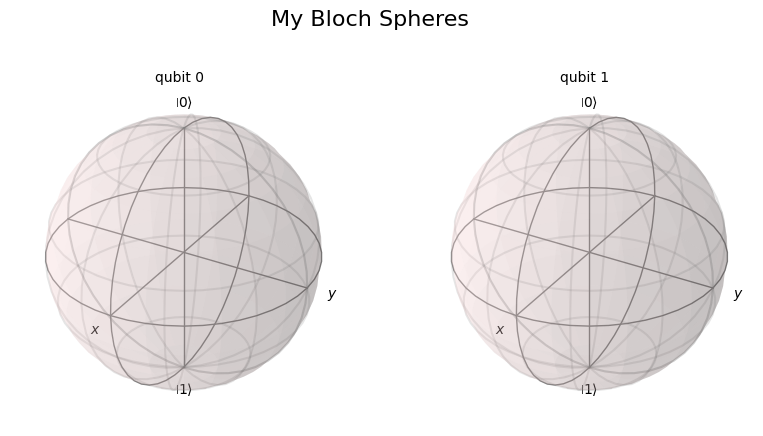

In [ ]:
plot_bloch_multivector(psi, title="My Bloch Spheres")

When an entangled state is created, by definition it is NON-SEPERABLE
(you cannot split the vector that constitutes it into two separate vectors).

Qiskit will fail to properly display seperate bloch spheres (because it's impossible!)

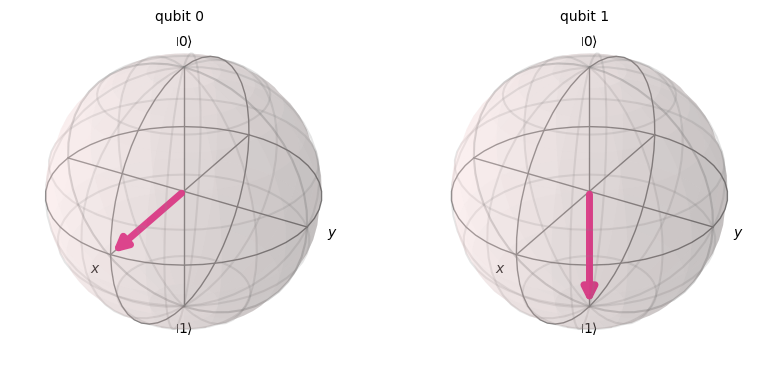

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)

state = Statevector(qc)
plot_bloch_multivector(state)

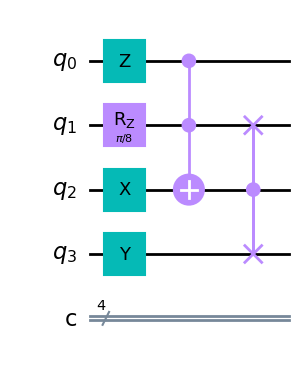

In [ ]:
# We can define even larger circuits...
qc = QuantumCircuit(4,4)
# apply some single qubit gates
qc.rz(np.pi/8, 1)
qc.z(0)
qc.y(3)
qc.x(2)
# apply a CCX or Toffoli gate with 0 and 1 as control qubits, 2 as the target qubit
qc.ccx(0,1,2)
# apply a controlled swap gate
qc.cswap(2,3,1)
qc.draw(output='mpl')

In [ ]:
# lets see what the statevector result looks like
state_vec = Statevector.from_instruction(qc)
state_vec

Statevector([0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.19509032+0.98078528j, 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ],
            dims=(2, 2, 2, 2))


In [ ]:
# can still see what the unitary matrix looks like
unitary_mat = Operator(qc)
unitary_mat

Operator([[ 0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
           -0.19509032-0.98078528j,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ],
          [ 0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.        +0.j        ,
            0.        +0.j        ,  0.19509032+0.98078528j,
            0.        +0.j        ,  0.        +0.j        ],
          [ 0.        

In [ ]:
unitary_mat.data

array([[ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
        -0.19509032-0.98078528j,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.19509032+0.98078528j,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0. 

In [ ]:
array_to_latex(unitary_mat.data)

<IPython.core.display.Latex object>

In [ ]:
array_to_latex(unitary_mat.data,  max_size=16)

<IPython.core.display.Latex object>

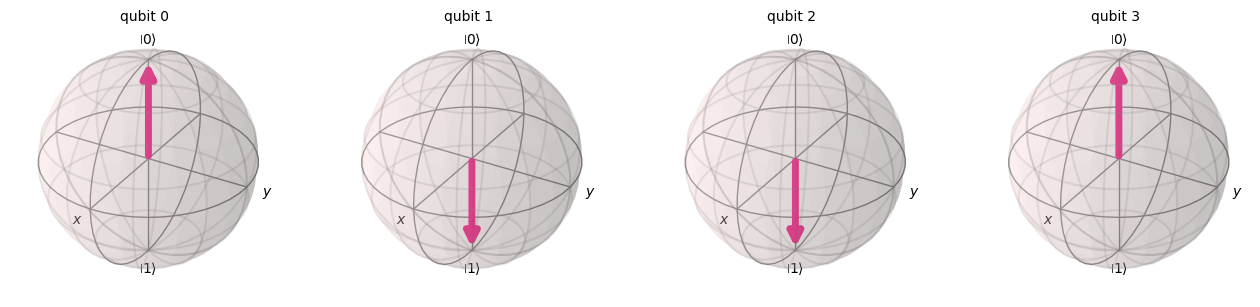

In [ ]:
# Should be able to visualize all the qubits too!
plot_bloch_multivector(state_vec)

##plot_bloch_vector

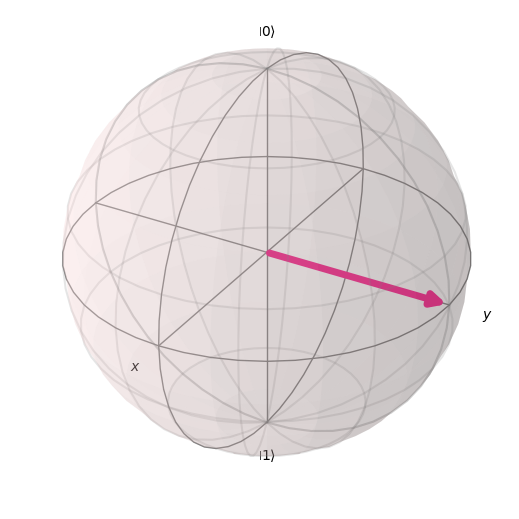

In [ ]:
plot_bloch_vector([0,1,0])

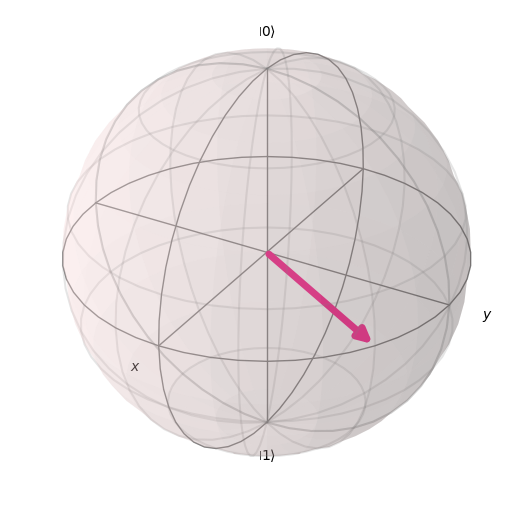

In [ ]:
plot_bloch_vector([1, np.pi/2, np.pi/3], coord_type='spherical')

#Rotation and other useful Gates
The X, Y, and Z gates are all based on the Pauli matrices and are known for making rotations of pi radians around the bloch sphere
on each respective axis.
What if I want to rotate some fractional amount instead of pi?
Each X,Y,Z gate has a version capable of accepting an argument theta that allows you to explicitly define the amount of rotation
desired on any axis

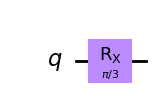

In [ ]:
qc = QuantumCircuit(1)
qc.rx(np.pi/3, 0)
qc.draw(output='mpl')

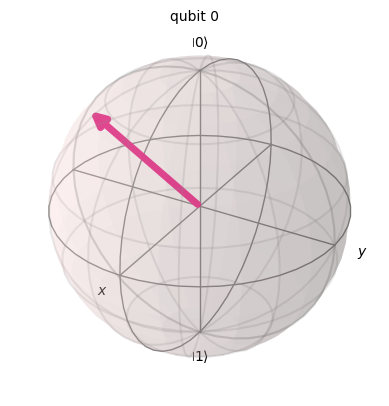

In [ ]:
state_vec = Statevector.from_instruction(qc)
plot_bloch_multivector(state_vec)

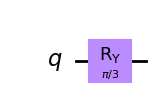

In [ ]:
qc5 = QuantumCircuit(1)
qc5.ry(np.pi/3, 0)
qc5.draw(output='mpl')

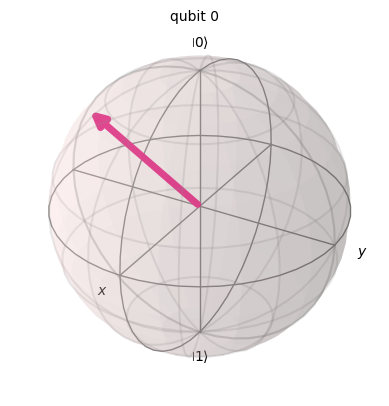

In [ ]:
state_vec5 = Statevector.from_instruction(qc5)
plot_bloch_multivector(state_vec)

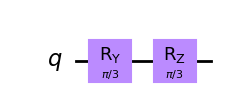

In [ ]:
qc6 = QuantumCircuit(1)
qc6.ry(np.pi/3, 0)
qc6.draw(output='mpl')
qc6.rz(np.pi/3, 0)
qc6.draw(output='mpl')

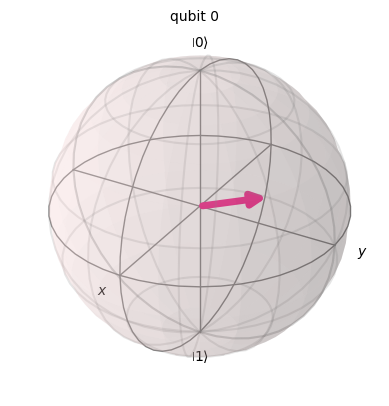

In [ ]:
state_vec6 = Statevector.from_instruction(qc6)
plot_bloch_multivector(state_vec6)

Custom Initialization

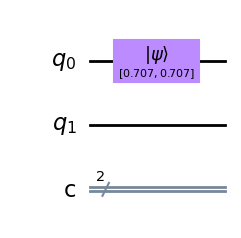

In [ ]:
# You can choose one qubit to initalize to a custom state:
qc = QuantumCircuit(2,2)
# Set qubit 0 to be in equal superposition
qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)
qc.draw(output='mpl')

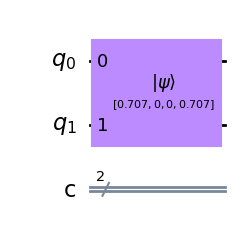

In [ ]:
# You can also set the entire system to be in a certain state
qc = QuantumCircuit(2,2)
# Set the system to be in a Bell State, note that I don't have to state the qubits being targeted
# (Although in Qiskit examples, they'll usually be explicit with which qubits were selected)
qc.initialize([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
qc.draw(output='mpl')

---
---

# Custom Gates
You may want to build your own gates from matrices at some point Qiskit makes this a cinch with UnitaryGate

In [ ]:
from qiskit.extensions import UnitaryGate

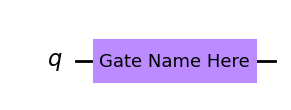

In [ ]:
custom_gate_matrix = np.eye(2) # 2x2 identity matrix

qc = QuantumCircuit(1)

custom_gate = UnitaryGate(custom_gate_matrix, label="Gate Name Here")
qc.append(custom_gate, [0])
qc.draw(output='mpl')

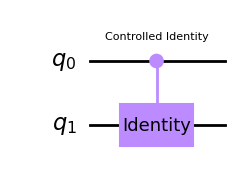

In [ ]:
# create a quantum circuit to play around with
qc = QuantumCircuit(2)

# We create a custom gate
custom_gate = UnitaryGate(np.eye(2), label="Identity")
# Then we get the controlled version, with 1 qubit for control and the qubit in question needing to be in the |1> state to turn on
# the gate
controlled_custom_gate = custom_gate.control(num_ctrl_qubits=1, label="Controlled Identity")

# Add the gate
# The [0,1] here tells qiskit we want qubit 0 to be control, qubit 1 to be the target
qc.append(controlled_custom_gate, [0,1])
qc.draw(output='mpl')

What if we want the control gate to only trigger when we detect |0> instead of |1>?

In [ ]:
# Note we can pass in ctrl_state as an integer OR as a string of 1s and 0s
controlled_custom_gate = custom_gate.control(num_ctrl_qubits=1, ctrl_state=0, label="Controlled Identity")

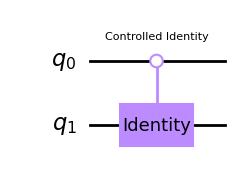

In [ ]:
qc6 = QuantumCircuit(2)
qc6.append(controlled_custom_gate, [0,1])
qc6.draw(output='mpl')

---
---

#Device backend noise model simulations
https://qiskit.org/documentation/stable/0.19/tutorials/simulators/2_device_noise_simulation.html

In [ ]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.test.mock import FakeVigo
device_backend = FakeVigo()

# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = device_backend.configuration().coupling_map

<ipython-input-75-00f3f355bf70>:2: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeVigo


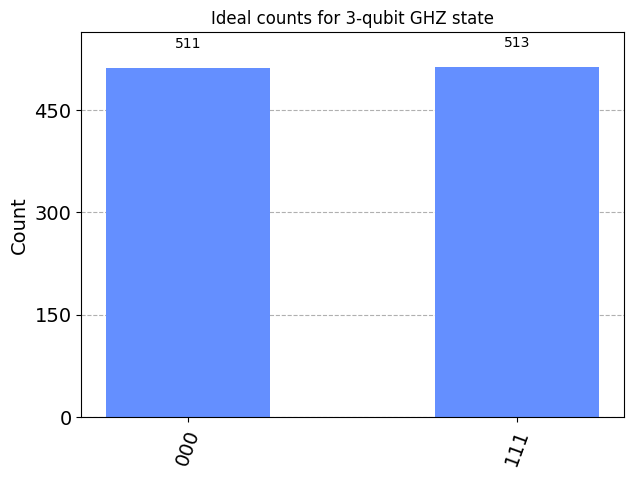

In [ ]:
# Construct quantum circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

In [ ]:
# Construct the noise model from backend properties
noise_model = NoiseModel.from_backend(device_backend)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['cx', 'measure', 'id', 'x', 'sx']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('cx', (3, 4)), ('cx', (4, 3)), ('cx', (3, 1)), ('cx', (1, 3)), ('cx', (1, 2)), ('cx', (2, 1)), ('cx', (0, 1)), ('cx', (1, 0)), ('measure', (0,)), ('measure', (1,)), ('measure', (2,)), ('measure', (3,)), ('measure', (4,))]


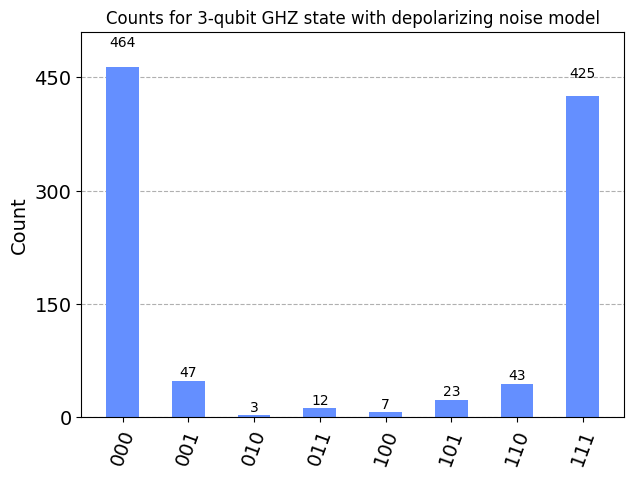

In [ ]:
# Get the basis gates for the noise model
basis_gates = noise_model.basis_gates

# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute noisy simulation and get counts
result_noise = execute(circ, simulator,
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(circ)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with depolarizing noise model")